In [1]:
import numpy as np
import matplotlib.pyplot as plt
import bilby

import scienceplots
plt.style.use(['science', 'bright'])

#import matplotlib as mpl

fontsize = 11
plt.rcParams['axes.labelsize'] = fontsize
plt.rc('xtick',labelsize=fontsize)
plt.rc('ytick',labelsize=fontsize)

plt.rcParams.update({
    'font.size': fontsize,              # Base font size
    'axes.titlesize': fontsize,         # Axes title
    'axes.labelsize': fontsize,         # Axes labels
    'xtick.labelsize': fontsize,        # X-axis tick labels
    'ytick.labelsize': fontsize,        # Y-axis tick labels
    'legend.fontsize': fontsize,        # Legend text
    'figure.titlesize': fontsize        # Figure title
})

In [2]:
ifos = bilby.gw.detector.InterferometerList(['ET'])
N = 100
ra = np.arange(0, 2*np.pi, 0.01)

ra_deg = np.rad2deg(ra)
dec = np.pi/2
tc = 0
psi = 1.6


In [3]:
patterns = {}
for ifo in ifos:
    for pola in ['plus', 'cross']:

        patterns[f"{ifo.name}_{pola}"] = np.zeros(len(ra))

        for ii in range(len(ra)):
            patterns[f"{ifo.name}_{pola}"][ii] = ifo.antenna_response(ra[ii], dec, tc, psi, pola)



In [4]:
sum_plus = patterns['ET1_plus'] + patterns['ET2_plus']  + patterns['ET3_plus'] 
sum_cross = patterns['ET1_cross'] + patterns['ET2_cross']  + patterns['ET3_cross'] 

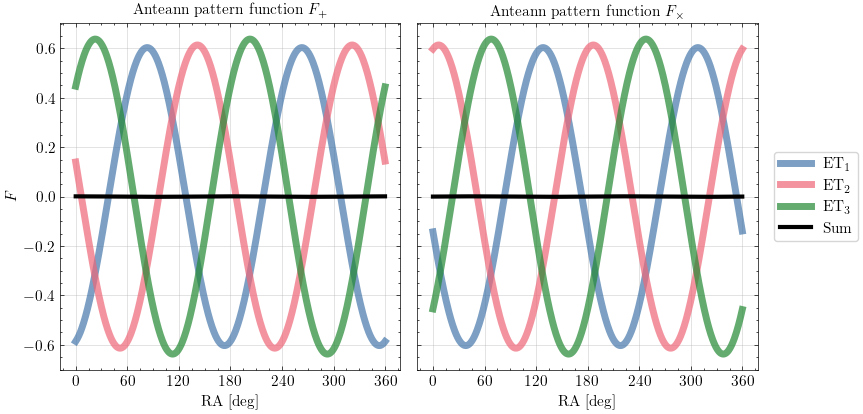

In [6]:
fig, ax = plt.subplots(1, 2, figsize = (4.5*2, 4.5), sharey = True, sharex = True, gridspec_kw={'wspace': 0.05})
lw = 5
alpha = 0.7
axes = ax[0]
axes.plot(ra_deg, patterns['ET1_plus'], label = 'ET$_1$', lw = lw, alpha = alpha)
axes.plot(ra_deg, patterns['ET2_plus'], label = 'ET$_2$', lw = lw, alpha = alpha)
axes.plot(ra_deg, patterns['ET3_plus'], label = 'ET$_3$', lw = lw, alpha = alpha)
axes.plot(ra_deg, sum_plus, color = 'black', lw = 3, label = 'Sum')
axes.set_title('Anteann pattern function $F_{+}$')
axes.grid(alpha = 0.5)
axes.set_xticks(np.arange(0, 361, 60))

axes.set_xlabel('RA [deg]')
axes.set_ylabel('$F$')

axes = ax[1]
axes.plot(ra_deg, patterns['ET1_cross'], label = 'ET$_1$', lw = lw, alpha = alpha)
axes.plot(ra_deg, patterns['ET2_cross'], label = 'ET$_2$', lw = lw, alpha = alpha)
axes.plot(ra_deg, patterns['ET3_cross'], label = 'ET$_3$', lw = lw, alpha = alpha)
axes.plot(ra_deg, sum_cross, color = 'black', lw = 3, label = 'Sum')
axes.set_title(r'Anteann pattern function $F_{\times}$')
axes.grid(alpha = 0.5)
axes.legend(loc='center left', bbox_to_anchor=(1.025, 0.5), frameon = True, fancybox = True)
axes.set_xlabel('RA [deg]')

fig.savefig('null_stream_antenna_pattern.pdf')
fig.savefig('../../figures/null_stream_antenna_pattern.pdf')